In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import scanpy as sc
import numpy as np
import pandas as pd
from matplotlib.pyplot import rc_context
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', 200)
#sc.logging.print_versions() 
sc.logging.print_header()
sc.settings.verbosity = 3  
sc.settings.set_figure_params(dpi=120, color_map='viridis')

scanpy==1.8.2 anndata==0.8.0 umap==0.5.2 numpy==1.21.0 scipy==1.8.0 pandas==1.4.2 scikit-learn==0.24.2 statsmodels==0.13.2 python-igraph==0.9.9 pynndescent==0.5.6


In [2]:
adata = sc.read('/home/jovyan/mounting_point/renal_covid_19_gex_myeloid_soupX_QC_orig.ident_annotated_levle23.h5ad',cache=True) #annotated data

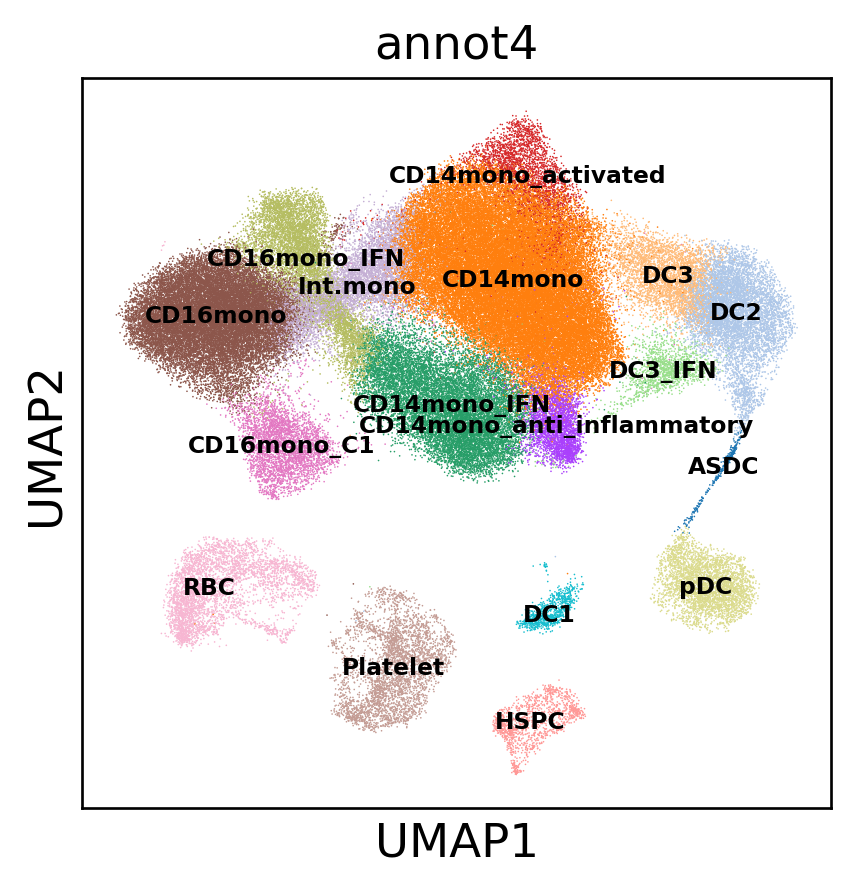

In [3]:
sc.pl.umap(adata,neighbors_key='X_pca_harmony_orig.ident',color=['annot4'], legend_fontsize = 7,legend_loc='on data')

In [4]:
list(adata.obs['annot4'].unique())

['CD14mono_activated',
 'CD16mono',
 'pDC',
 'CD14mono',
 'Int.mono',
 'CD16mono_C1',
 'CD16mono_IFN',
 'CD14mono_IFN',
 'RBC',
 'DC2',
 'Platelet',
 'CD14mono_anti_inflammatory',
 'HSPC',
 'DC3',
 'DC1',
 'DC3_IFN',
 'ASDC']

In [5]:
'C139' in list(adata.obs['sample_id_broad'].unique())

False

In [6]:
'C116' in list(adata.obs['sample_id_broad'].unique())

False

In [7]:
'C141' in list(adata.obs['sample_id_broad'].unique())

True

In [8]:
#remove C141 from the samples
adata = adata[~adata.obs['sample_id_broad'].isin(['C141'])]

In [9]:
'C141' in list(adata.obs['sample_id_broad'].unique())

False

In [10]:
#get monocyte only
monocyte = adata[adata.obs['annot4'].isin(['CD14mono_activated','CD16mono','CD14mono','Int.mono','CD16mono_C1','CD16mono_IFN','CD14mono_IFN','CD14mono_anti_inflammatory'])]

In [11]:
list(monocyte.obs['annot4'].unique())

['CD14mono_activated',
 'CD16mono',
 'CD14mono',
 'Int.mono',
 'CD16mono_C1',
 'CD16mono_IFN',
 'CD14mono_IFN',
 'CD14mono_anti_inflammatory']

In [12]:
list(monocyte.obs['case_control'].unique())

['NEGATIVE', 'nan', 'POSITIVE', 'RECOVERY']

In [13]:
#remove 'nan' from case_control
monocyte = monocyte[monocyte.obs['case_control']!='nan']

In [14]:
list(monocyte.obs['case_control'].unique())

['NEGATIVE', 'POSITIVE', 'RECOVERY']

In [15]:
#getting p,n,r in wave 1 and wave 2

monocyte.obs['wave_case_control']='nan'
monocyte.obs.loc[(monocyte.obs["centre"]=='NCL') &(monocyte.obs["case_control"]=='POSITIVE'), "wave_case_control"] = 'wave1_positive'
monocyte.obs.loc[(monocyte.obs["centre"]=='NCL') &(monocyte.obs["case_control"]=='NEGATIVE'), "wave_case_control"] = 'wave1_negative'
monocyte.obs.loc[(monocyte.obs["centre"]=='NCL') &(monocyte.obs["case_control"]=='RECOVERY'), "wave_case_control"] = 'wave1_recovery'

monocyte.obs.loc[(monocyte.obs["centre"]=='Cambridge') &(monocyte.obs["case_control"]=='POSITIVE'), "wave_case_control"] = 'wave2_positive'
monocyte.obs.loc[(monocyte.obs["centre"]=='Cambridge') &(monocyte.obs["case_control"]=='NEGATIVE'), "wave_case_control"] = 'wave2_negative'
monocyte.obs.loc[(monocyte.obs["centre"]=='Cambridge') &(monocyte.obs["case_control"]=='RECOVERY'), "wave_case_control"] = 'wave2_recovery'

/tmp/ipykernel_180/279369363.py:3: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  monocyte.obs['wave_case_control']='nan'
/home/jovyan/my-conda-envs/Py_env2/lib/python3.8/contextlib.py:120: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  next(self.gen)


In [16]:
list(monocyte.obs['wave_case_control'].unique()) #wave 1 doesn't have recovery samples

['wave1_negative',
 'wave1_positive',
 'wave2_positive',
 'wave2_negative',
 'wave2_recovery']

In [ ]:
#test = monocyte[monocyte.obs['wave_case_control']=='wave2_recovery']
#print (list(test.obs['case_control'].unique()))
#print (list(test.obs['centre'].unique()))

In [17]:
df = pd.crosstab(monocyte.obs['wave_case_control'],monocyte.obs['annot4'])
df

annot4,CD14mono,CD14mono_IFN,CD14mono_activated,CD14mono_anti_inflammatory,CD16mono,CD16mono_C1,CD16mono_IFN,Int.mono
wave_case_control,,,,,,,,
wave1_negative,11735,656,1416,140,6638,461,621,2082
wave1_positive,9561,3474,786,458,4689,1104,1792,982
wave2_negative,2545,57,94,7,2065,84,79,433
wave2_positive,14547,6499,358,1888,4717,1272,3159,1775
wave2_recovery,2763,128,78,11,2328,95,102,503


In [18]:
df.columns = df.columns.add_categories(['wave'])
df['wave'] = df.index # making index into column
df

annot4,CD14mono,CD14mono_IFN,CD14mono_activated,CD14mono_anti_inflammatory,CD16mono,CD16mono_C1,CD16mono_IFN,Int.mono,wave
wave_case_control,,,,,,,,,
wave1_negative,11735,656,1416,140,6638,461,621,2082,wave1_negative
wave1_positive,9561,3474,786,458,4689,1104,1792,982,wave1_positive
wave2_negative,2545,57,94,7,2065,84,79,433,wave2_negative
wave2_positive,14547,6499,358,1888,4717,1272,3159,1775,wave2_positive
wave2_recovery,2763,128,78,11,2328,95,102,503,wave2_recovery


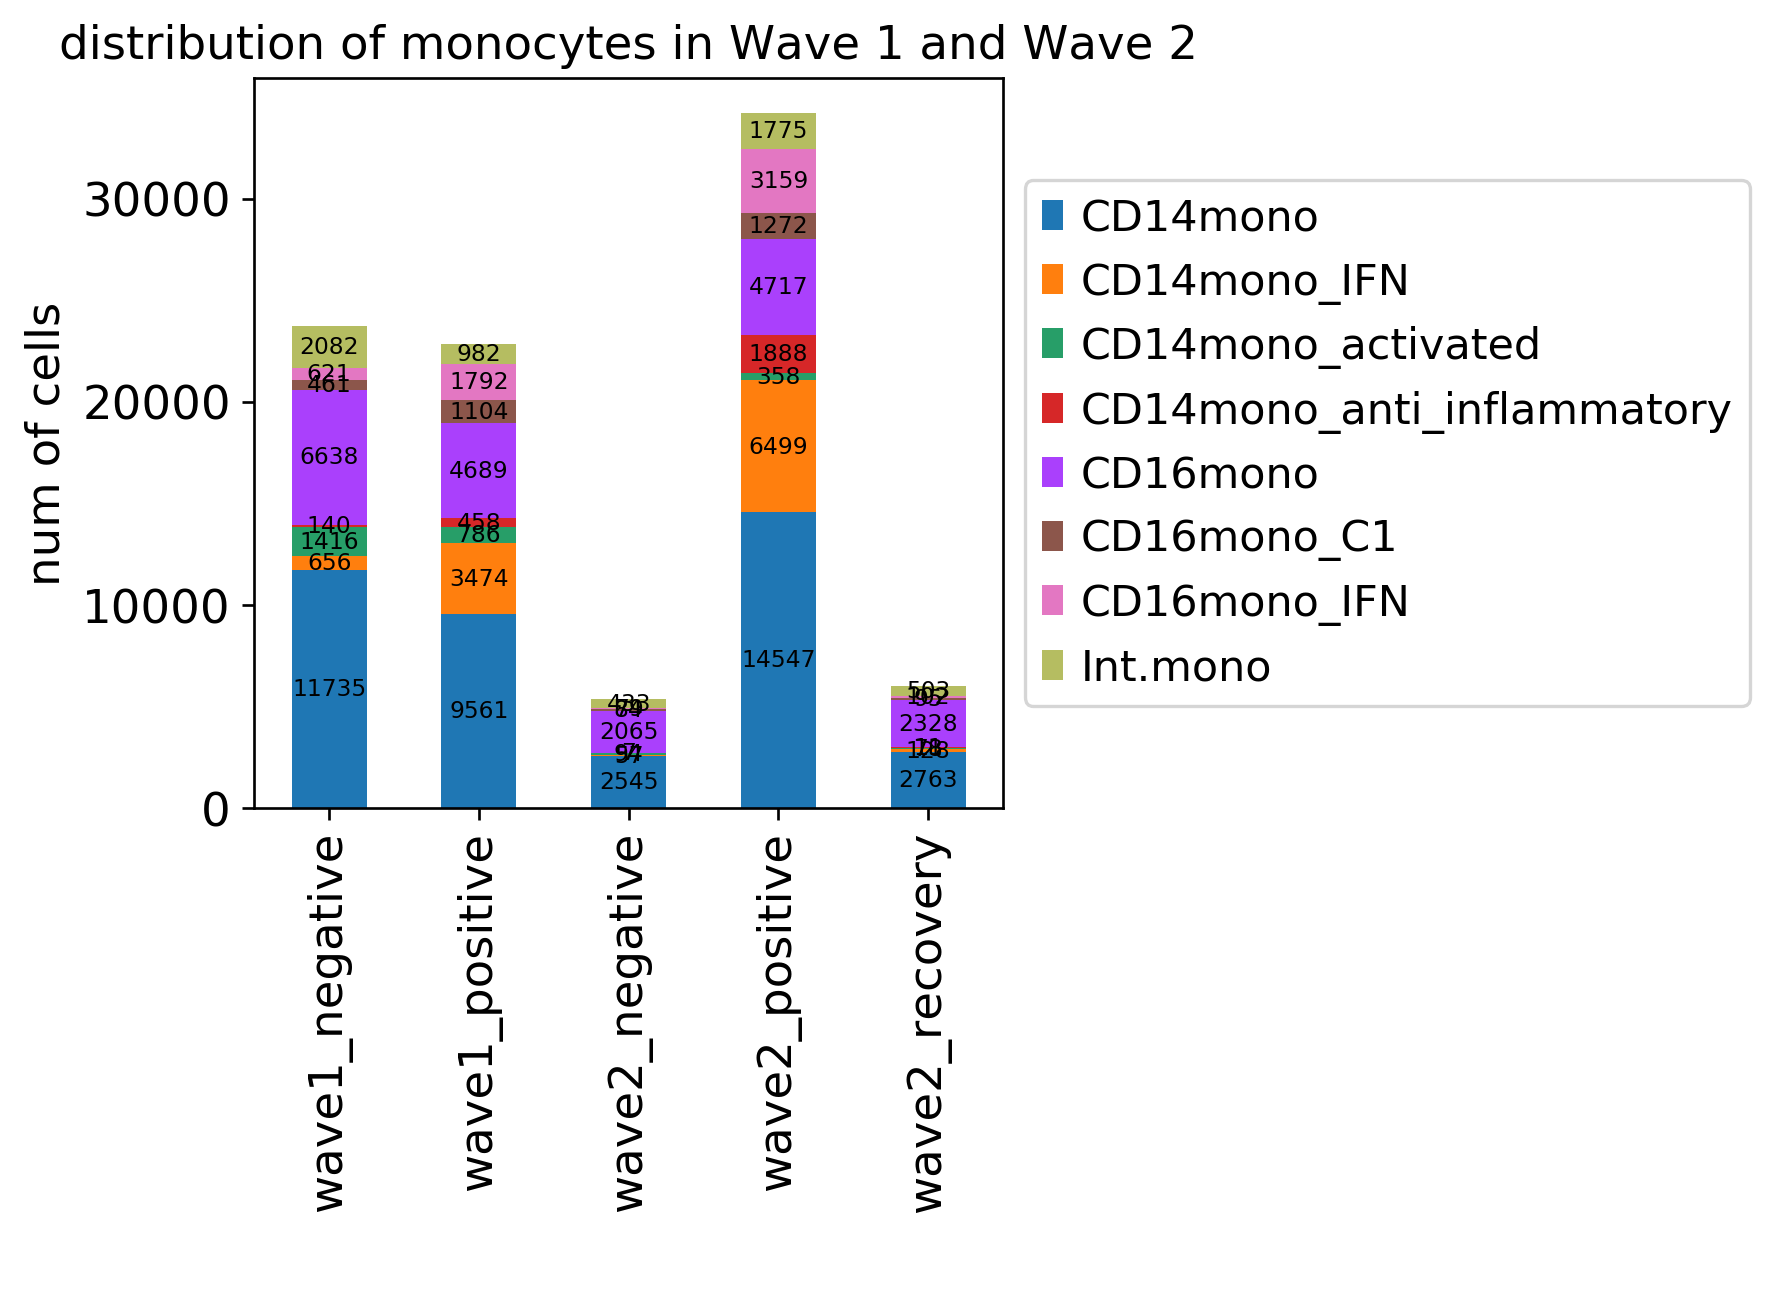

In [19]:
p1=df.plot(x='wave', kind='bar', stacked=True,
        title='distribution of monocytes in Wave 1 and Wave 2')
p1.set_ylabel("num of cells")
p1.set_xlabel(" ")
plt.grid(False)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
for p in p1.patches:
        width, height = p.get_width(), p.get_height()
        x, y = p.get_xy() 
        p1.text(x+width/2, 
            y+height/2, 
            '{:.0f}'.format(height), 
            horizontalalignment='center', 
            verticalalignment='center',rotation=0,size=7)  

In [20]:
#getting percentage
cols = list(df.columns)
cols = cols[:-1]
df[cols] = df[cols].div(df[cols].sum(axis=1), axis=0).multiply(100)

In [21]:
df

annot4,CD14mono,CD14mono_IFN,CD14mono_activated,CD14mono_anti_inflammatory,CD16mono,CD16mono_C1,CD16mono_IFN,Int.mono,wave
wave_case_control,,,,,,,,,
wave1_negative,49.412607,2.762222,5.962356,0.589499,27.950651,1.941134,2.614847,8.766685,wave1_negative
wave1_positive,41.849777,15.206163,3.440427,2.004727,20.524381,4.832356,7.843824,4.298345,wave1_positive
wave2_negative,47.445936,1.062640,1.752424,0.130500,38.497390,1.565996,1.472782,8.072334,wave2_negative
wave2_positive,42.516440,18.994593,1.046325,5.518048,13.786351,3.717668,9.232793,5.187783,wave2_positive
wave2_recovery,45.988682,2.130493,1.298269,0.183089,38.748336,1.581225,1.697736,8.372170,wave2_recovery


In [22]:
df.sum(axis=1)

/tmp/ipykernel_180/1459321664.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.sum(axis=1)


wave_case_control
wave1_negative    100.0
wave1_positive    100.0
wave2_negative    100.0
wave2_positive    100.0
wave2_recovery    100.0
dtype: float64

In [23]:
monocyte.obs['wave_case_control'].value_counts()

wave2_positive    34215
wave1_negative    23749
wave1_positive    22846
wave2_recovery     6008
wave2_negative     5364
Name: wave_case_control, dtype: int64

Text(3.8, 101, '6008')

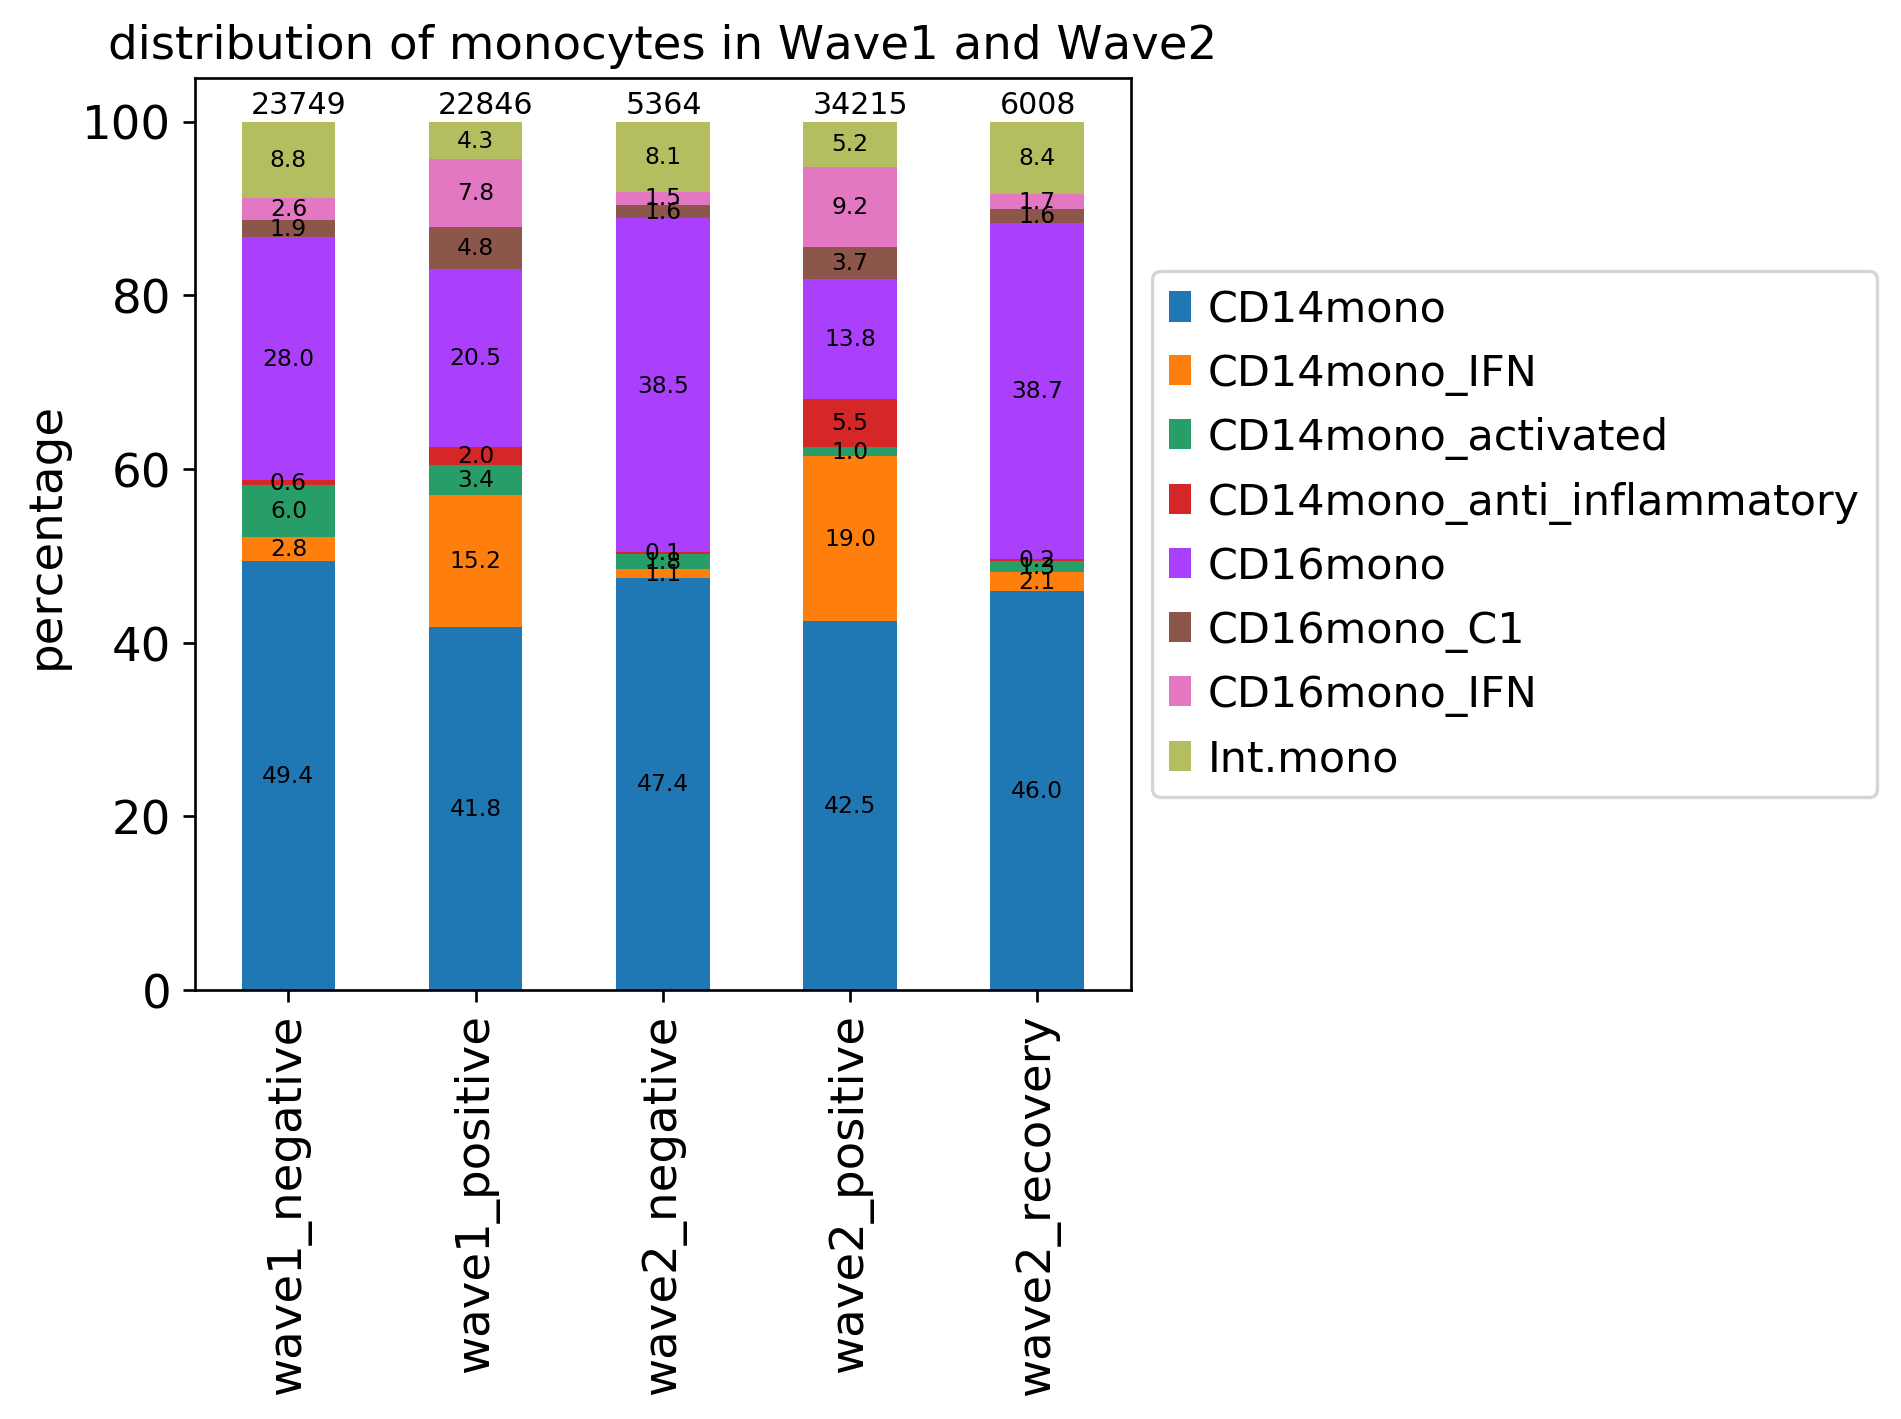

In [24]:
p2 = df.plot(x='wave', kind='bar', stacked=True,
        title='distribution of monocytes in Wave1 and Wave2',figsize=(5,5))
p2.set_ylabel('percentage')
p2.set_xlabel('')
plt.grid(False)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
for p in p2.patches:
        width, height = p.get_width(), p.get_height()
        x, y = p.get_xy() 
        p2.text(x+width/2, 
            y+height/2, 
            '{:.1f}'.format(height), 
            horizontalalignment='center', 
            verticalalignment='center',rotation=0,size=7)  




p2.text(-0.2,101,'23749',fontsize=9)
p2.text(0.8,101,'22846',fontsize=9)
p2.text(1.8,101,'5364',fontsize=9)
p2.text(2.8,101,'34215',fontsize=9)
p2.text(3.8,101,'6008',fontsize=9)

# Getting wave 2 only 

In [25]:
monocyte_wave1 = monocyte[monocyte.obs['centre']=='NCL']
monocyte_wave2 = monocyte[monocyte.obs['centre']=='Cambridge']

In [26]:
monocyte_wave2.obs['case_control'].unique()

['POSITIVE', 'NEGATIVE', 'RECOVERY']
Categories (3, object): ['NEGATIVE', 'POSITIVE', 'RECOVERY']

In [27]:
# adding steroid status and case_control conditions

monocyte_wave2.obs['steroid_status']='nan'

monocyte_wave2.obs.loc[(monocyte_wave2.obs["sample_id_broad"].isin(['C146',
'C139',
'C147',
'C145',
'C138',
'C33',
'C101',
'C141'])) &(monocyte_wave2.obs['case_control']=='POSITIVE'), "steroid_status"] = 'steroid_positive'

monocyte_wave2.obs.loc[(monocyte_wave2.obs["sample_id_broad"].isin(['C146',
'C139',
'C147',
'C145',
'C138',
'C33',
'C101',
'C141'])) &(monocyte_wave2.obs['case_control']=='NEGATIVE'), "steroid_status"] = 'steroid_negative'

monocyte_wave2.obs.loc[(monocyte_wave2.obs["sample_id_broad"].isin(['C146',
'C139',
'C147',
'C145',
'C138',
'C33',
'C101',
'C141'])) &(monocyte_wave2.obs['case_control']=='RECOVERY'), "steroid_status"] = 'steroid_recovery'

#####################

monocyte_wave2.obs.loc[(monocyte_wave2.obs["sample_id_broad"].isin(['C169',
'C170',
'C168',
'C108',
'C58',
'C140',
'C137',
'C187',
'C190']))&(monocyte_wave2.obs['case_control']=='POSITIVE'), "steroid_status"] = 'no_steroid_positive'

monocyte_wave2.obs.loc[(monocyte_wave2.obs["sample_id_broad"].isin(['C169',
'C170',
'C168',
'C108',
'C58',
'C140',
'C137',
'C187',
'C190']))&(monocyte_wave2.obs['case_control']=='NEGATIVE'), "steroid_status"] = 'no_steroid_negative'


monocyte_wave2.obs.loc[(monocyte_wave2.obs["sample_id_broad"].isin(['C169',
'C170',
'C168',
'C108',
'C58',
'C140',
'C137',
'C187',
'C190']))&(monocyte_wave2.obs['case_control']=='RECOVERY'), "steroid_status"] = 'no_steroid_recovery'



/tmp/ipykernel_180/2856638656.py:3: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  monocyte_wave2.obs['steroid_status']='nan'


In [28]:
list(monocyte_wave2.obs['steroid_status'].unique())

['steroid_positive',
 'no_steroid_positive',
 'no_steroid_negative',
 'no_steroid_recovery',
 'steroid_recovery',
 'steroid_negative']

In [29]:
#test = monocyte_wave2[monocyte_wave2.obs['steroid_status']=='steroid_negative']
#print (test.obs['case_control'].unique())

In [30]:
df = pd.crosstab(monocyte_wave2.obs['steroid_status'],monocyte_wave2.obs['annot4'])
df

annot4,CD14mono,CD14mono_IFN,CD14mono_activated,CD14mono_anti_inflammatory,CD16mono,CD16mono_C1,CD16mono_IFN,Int.mono
steroid_status,,,,,,,,
no_steroid_negative,1819,28,83,4,1695,51,68,359
no_steroid_positive,10300,2695,302,102,4318,584,1544,1568
no_steroid_recovery,2075,115,45,6,2154,87,99,452
steroid_negative,726,29,11,3,370,33,11,74
steroid_positive,4247,3804,56,1786,399,688,1615,207
steroid_recovery,688,13,33,5,174,8,3,51


In [31]:
df.columns = df.columns.add_categories(['steroid_status'])
df['steroid_status'] = df.index # making index into column
df

annot4,CD14mono,CD14mono_IFN,CD14mono_activated,CD14mono_anti_inflammatory,CD16mono,CD16mono_C1,CD16mono_IFN,Int.mono,steroid_status
steroid_status,,,,,,,,,
no_steroid_negative,1819,28,83,4,1695,51,68,359,no_steroid_negative
no_steroid_positive,10300,2695,302,102,4318,584,1544,1568,no_steroid_positive
no_steroid_recovery,2075,115,45,6,2154,87,99,452,no_steroid_recovery
steroid_negative,726,29,11,3,370,33,11,74,steroid_negative
steroid_positive,4247,3804,56,1786,399,688,1615,207,steroid_positive
steroid_recovery,688,13,33,5,174,8,3,51,steroid_recovery


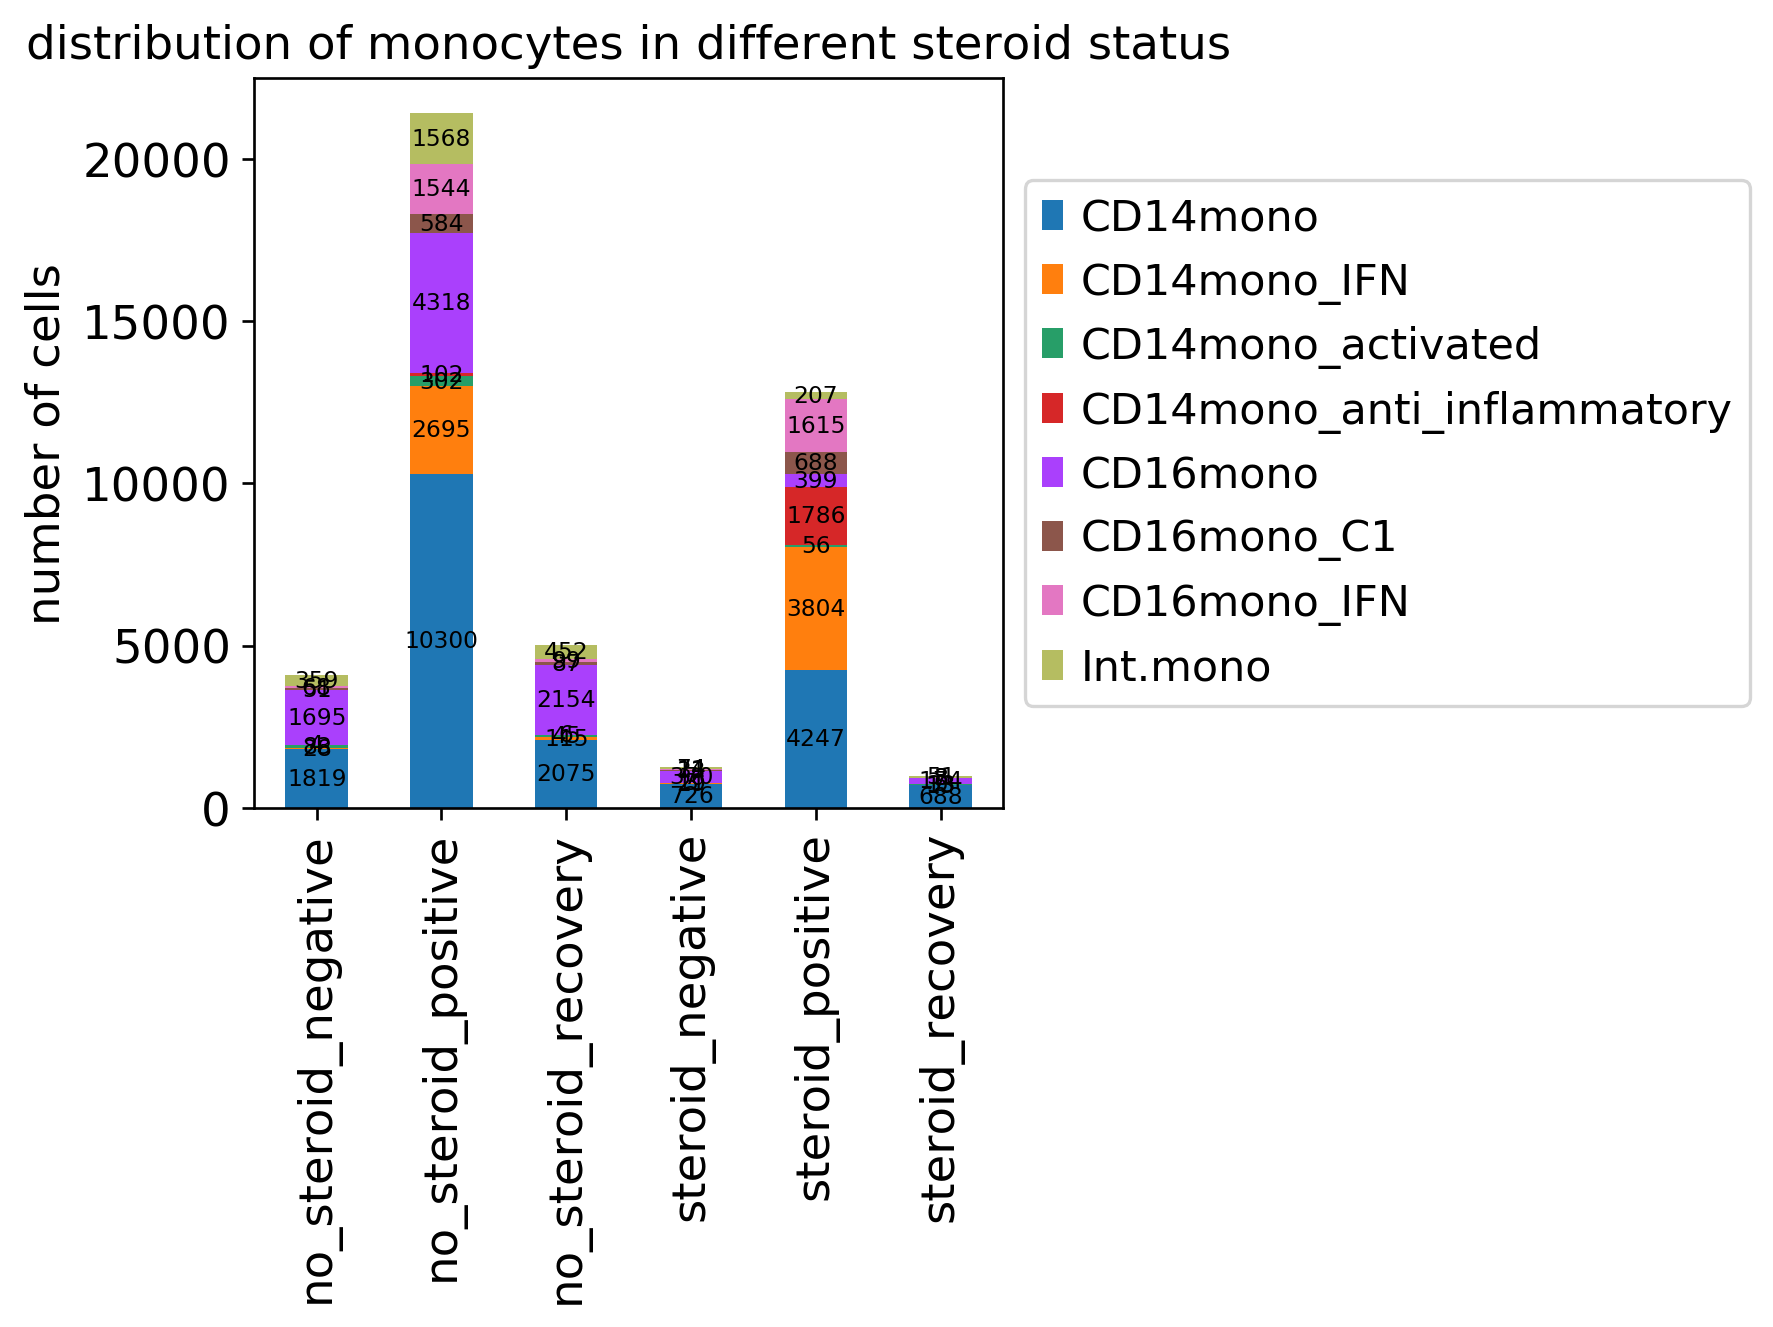

In [32]:
p1=df.plot(x='steroid_status', kind='bar', stacked=True,
        title='distribution of monocytes in different steroid status')
p1.set_xlabel('')
p1.set_ylabel('number of cells')

plt.grid(False)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
for p in p1.patches:
        width, height = p.get_width(), p.get_height()
        x, y = p.get_xy() 
        p1.text(x+width/2, 
            y+height/2, 
            '{:.0f}'.format(height), 
            horizontalalignment='center', 
            verticalalignment='center',rotation=0,size=7)  

In [33]:
cols = list(df.columns)
cols = cols[:-1]
df[cols] = df[cols].div(df[cols].sum(axis=1), axis=0).multiply(100)

In [34]:
df.sum(axis=1)

/tmp/ipykernel_180/1459321664.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.sum(axis=1)


steroid_status
no_steroid_negative    100.0
no_steroid_positive    100.0
no_steroid_recovery    100.0
steroid_negative       100.0
steroid_positive       100.0
steroid_recovery       100.0
dtype: float64

In [35]:
monocyte_wave2.obs['steroid_status'].value_counts()

no_steroid_positive    21413
steroid_positive       12802
no_steroid_recovery     5033
no_steroid_negative     4107
steroid_negative        1257
steroid_recovery         975
Name: steroid_status, dtype: int64

Text(4.8, 101, '975')

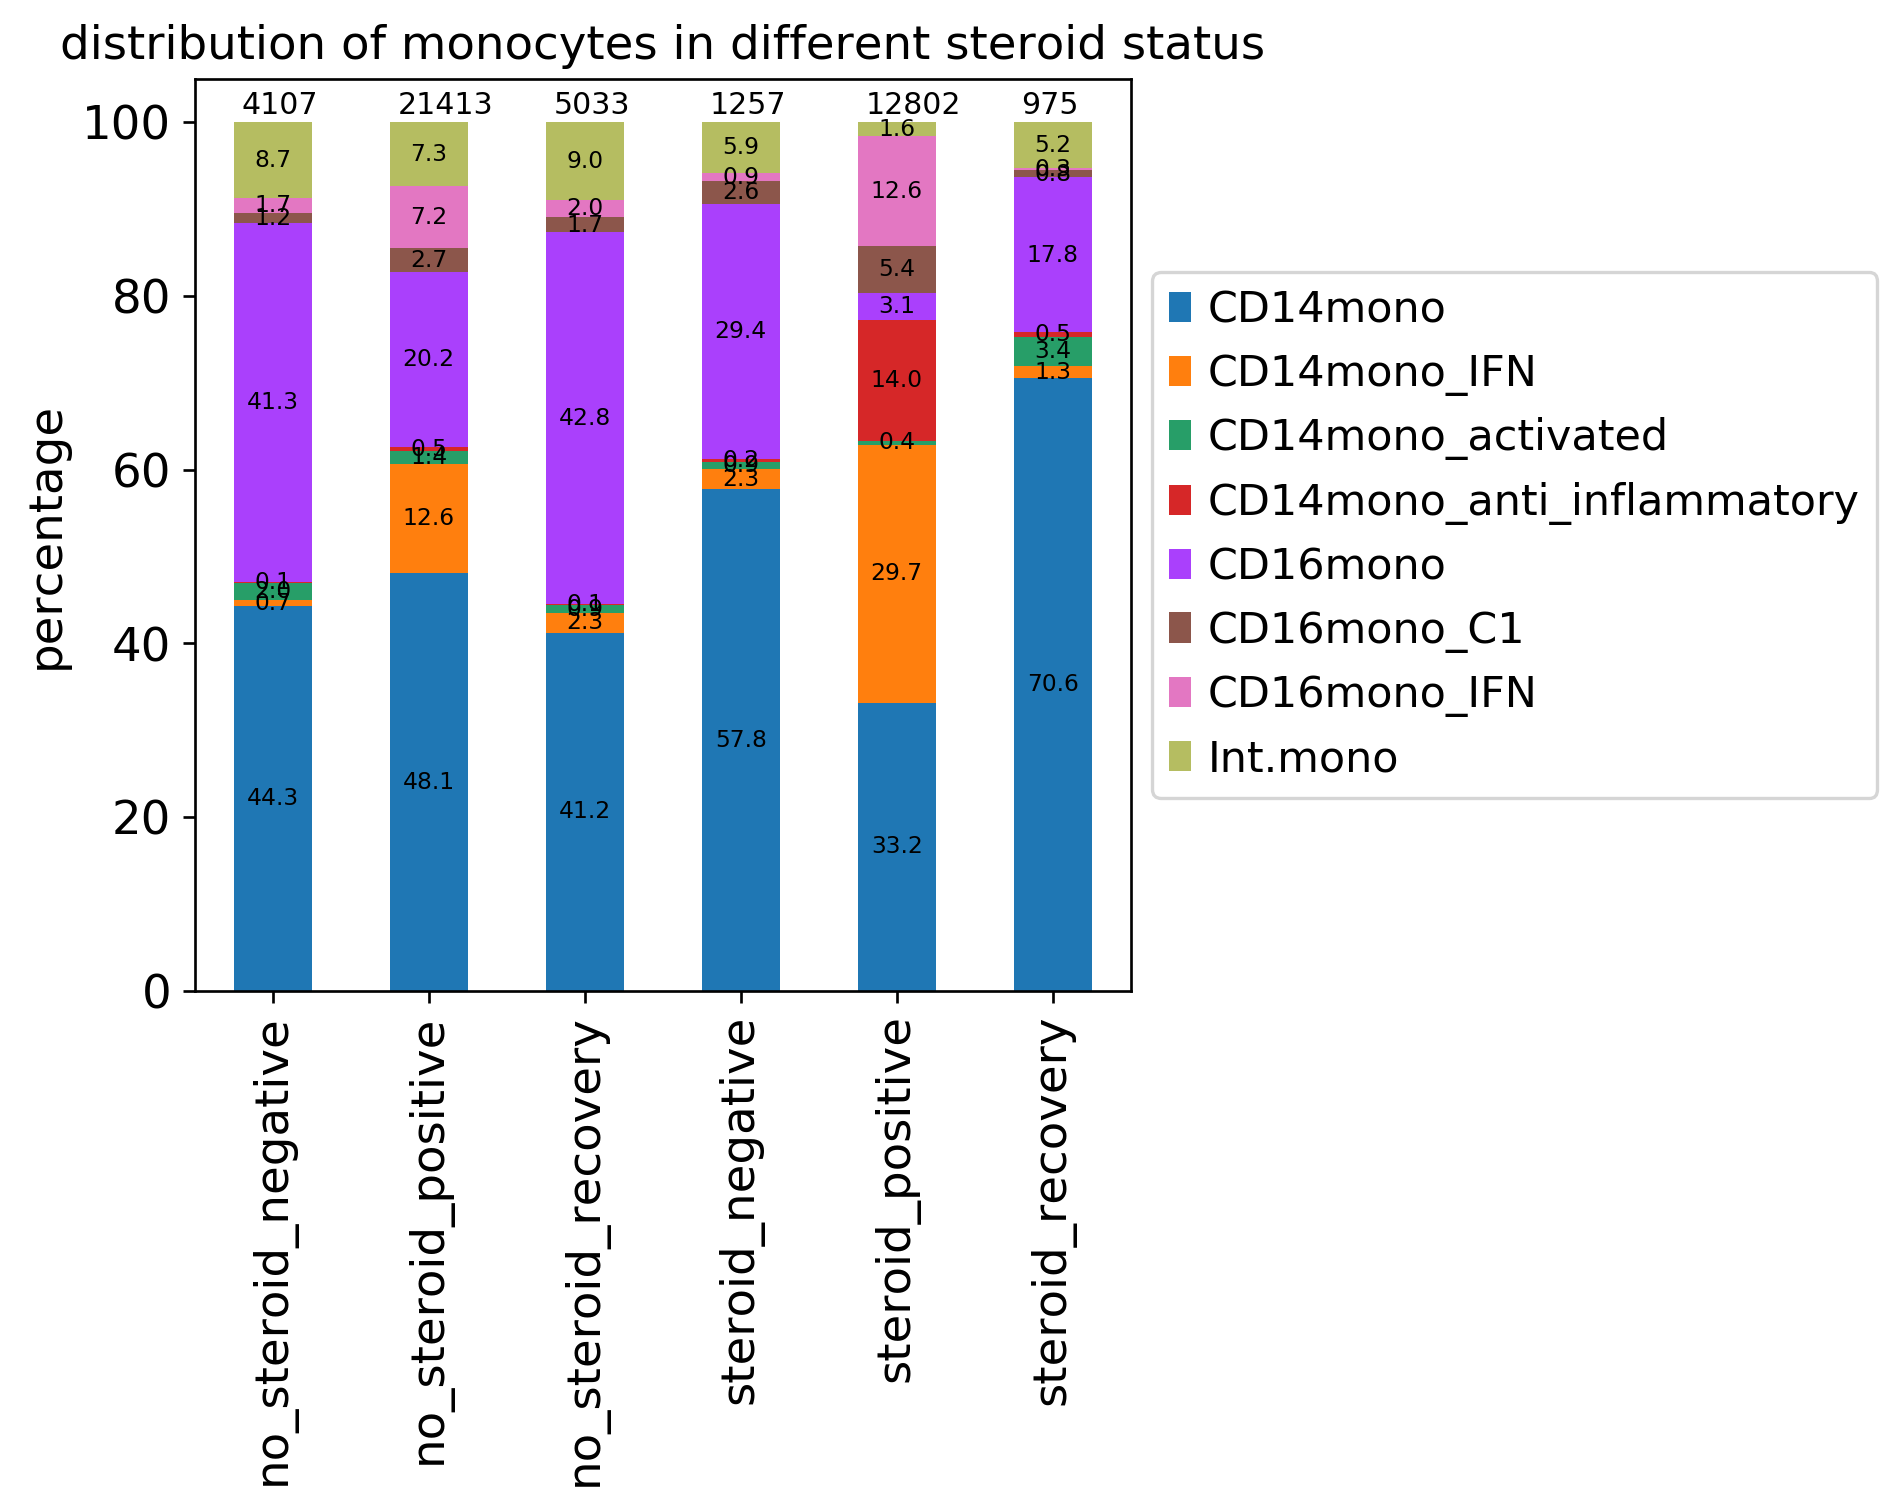

In [36]:
p2 = df.plot(x='steroid_status', kind='bar', stacked=True,
        title='distribution of monocytes in different steroid status',figsize=(5,5))
plt.grid(False)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
p2.set_xlabel('')
p2.set_ylabel('percentage')
for p in p2.patches:
        width, height = p.get_width(), p.get_height()
        x, y = p.get_xy() 
        p2.text(x+width/2, 
            y+height/2, 
            '{:.1f}'.format(height), 
            horizontalalignment='center', 
            verticalalignment='center',rotation=0,size=7)  


p2.text(-0.2,101,'4107',fontsize=9)
p2.text(0.8,101,'21413',fontsize=9)
p2.text(1.8,101,'5033',fontsize=9)
p2.text(2.8,101,'1257',fontsize=9)
p2.text(3.8,101,'12802',fontsize=9)
p2.text(4.8,101,'975',fontsize=9)

# steroid only

In [37]:
# to get sub-samples who got steroid 
steroid = monocyte_wave2[monocyte_wave2.obs['sample_id_broad'].isin(['C146',
'C139',
'C147',
'C145',
'C138',
'C33',
'C101',
'C141'])]


no_steroid = monocyte_wave2[monocyte_wave2.obs['sample_id_broad'].isin(['C169',
'C170',
'C168',
'C108',
'C58',
'C140',
'C137',
'C187',
'C190'])]


In [38]:
(list(steroid.obs['case_control'].unique()))

['POSITIVE', 'RECOVERY', 'NEGATIVE']

In [39]:
# adding metdata about before and after steroid samples based on date of steroid injection
steroid.obs['steroid_timeline']='nan'

steroid.obs.loc[(steroid.obs["sample_id"].isin(['C138_230121','C138_280121','C138_260121','C101_060121',
                                                                     'C141_020221','C141_200121','C141_300121','C141_220121',
                                                                      'C141_260121','C146_120121','C146_160121','C146_140121',
                                                                      'C146_190121','C147_140121','C33_140121','C33_190121','C33_160121']))&(steroid.obs['case_control']=='POSITIVE'), "steroid_timeline"] = 'before_steroid_pos'
steroid.obs.loc[(steroid.obs["sample_id"].isin(['C138_230121','C138_280121','C138_260121','C101_060121',
                                                                     'C141_020221','C141_200121','C141_300121','C141_220121',
                                                                      'C141_260121','C146_120121','C146_160121','C146_140121',
                                                                      'C146_190121','C147_140121','C33_140121','C33_190121','C33_160121']))&(steroid.obs['case_control']=='NEGATIVE'), "steroid_timeline"] = 'before_steroid_neg'
steroid.obs.loc[(steroid.obs["sample_id"].isin(['C138_230121','C138_280121','C138_260121','C101_060121',
                                                                     'C141_020221','C141_200121','C141_300121','C141_220121',
                                                                      'C141_260121','C146_120121','C146_160121','C146_140121',
                                                                      'C146_190121','C147_140121','C33_140121','C33_190121','C33_160121']))&(steroid.obs['case_control']=='RECOVERY'), "steroid_timeline"] = 'before_steroid_rec'

##########################

steroid.obs.loc[(steroid.obs["sample_id"].isin(['C138_040221','C138_020221','C138_300121','C138_300420',
                                                                    'C101_110121','C101_250221','C101_200121','C101_130121',
                                                                    'C101_180121','C141_090321','C145_230121','C145_190121',
                                                                    'C145_070121','C145_140121','C145_120121','C145_300420','C146_250221','C146_270121',
                                                                     'C146_230121','C146_300420','C147_280121','C147_260121','C147_190121','C147_230121','C147_300420',
                                                                     'C33_260121']))&(steroid.obs['case_control']=='POSITIVE'), "steroid_timeline"] = 'after_steroid_pos'
steroid.obs.loc[(steroid.obs["sample_id"].isin(['C138_040221','C138_020221','C138_300121','C138_300420',
                                                                    'C101_110121','C101_250221','C101_200121','C101_130121',
                                                                    'C101_180121','C141_090321','C145_230121','C145_190121',
                                                                    'C145_070121','C145_140121','C145_120121','C145_300420','C146_250221','C146_270121',
                                                                     'C146_230121','C146_300420','C147_280121','C147_260121','C147_190121','C147_230121','C147_300420',
                                                                     'C33_260121']))&(steroid.obs['case_control']=='NEGATIVE'), "steroid_timeline"] = 'after_steroid_neg'

steroid.obs.loc[(steroid.obs["sample_id"].isin(['C138_040221','C138_020221','C138_300121','C138_300420',
                                                                    'C101_110121','C101_250221','C101_200121','C101_130121',
                                                                    'C101_180121','C141_090321','C145_230121','C145_190121',
                                                                    'C145_070121','C145_140121','C145_120121','C145_300420','C146_250221','C146_270121',
                                                                     'C146_230121','C146_300420','C147_280121','C147_260121','C147_190121','C147_230121','C147_300420',
                                                                     'C33_260121']))&(steroid.obs['case_control']=='RECOVERY'), "steroid_timeline"] = 'after_steroid_rec'






/tmp/ipykernel_180/915130983.py:2: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  steroid.obs['steroid_timeline']='nan'


In [40]:
steroid.obs['steroid_timeline'].unique()

array(['after_steroid_pos', 'before_steroid_pos', 'after_steroid_rec',
       'after_steroid_neg'], dtype=object)

In [41]:
#test = steroid[steroid.obs['steroid_timeline']=='after_steroid_neg']
#print(test.obs['case_control'].unique())

In [42]:
df = pd.crosstab(steroid.obs['steroid_timeline'],steroid.obs['annot4'])
df

annot4,CD14mono,CD14mono_IFN,CD14mono_activated,CD14mono_anti_inflammatory,CD16mono,CD16mono_C1,CD16mono_IFN,Int.mono
steroid_timeline,,,,,,,,
after_steroid_neg,726,29,11,3,370,33,11,74
after_steroid_pos,3982,1166,44,1676,265,341,314,135
after_steroid_rec,688,13,33,5,174,8,3,51
before_steroid_pos,265,2638,12,110,134,347,1301,72


In [43]:
df.columns = df.columns.add_categories(['steroid_timeline'])
df['steroid_timeline'] = df.index # making index into column

In [44]:
df

annot4,CD14mono,CD14mono_IFN,CD14mono_activated,CD14mono_anti_inflammatory,CD16mono,CD16mono_C1,CD16mono_IFN,Int.mono,steroid_timeline
steroid_timeline,,,,,,,,,
after_steroid_neg,726,29,11,3,370,33,11,74,after_steroid_neg
after_steroid_pos,3982,1166,44,1676,265,341,314,135,after_steroid_pos
after_steroid_rec,688,13,33,5,174,8,3,51,after_steroid_rec
before_steroid_pos,265,2638,12,110,134,347,1301,72,before_steroid_pos


In [45]:
df=df.reindex(["before_steroid_pos", "after_steroid_pos", "after_steroid_rec",'after_steroid_neg'])
df

annot4,CD14mono,CD14mono_IFN,CD14mono_activated,CD14mono_anti_inflammatory,CD16mono,CD16mono_C1,CD16mono_IFN,Int.mono,steroid_timeline
steroid_timeline,,,,,,,,,
before_steroid_pos,265,2638,12,110,134,347,1301,72,before_steroid_pos
after_steroid_pos,3982,1166,44,1676,265,341,314,135,after_steroid_pos
after_steroid_rec,688,13,33,5,174,8,3,51,after_steroid_rec
after_steroid_neg,726,29,11,3,370,33,11,74,after_steroid_neg


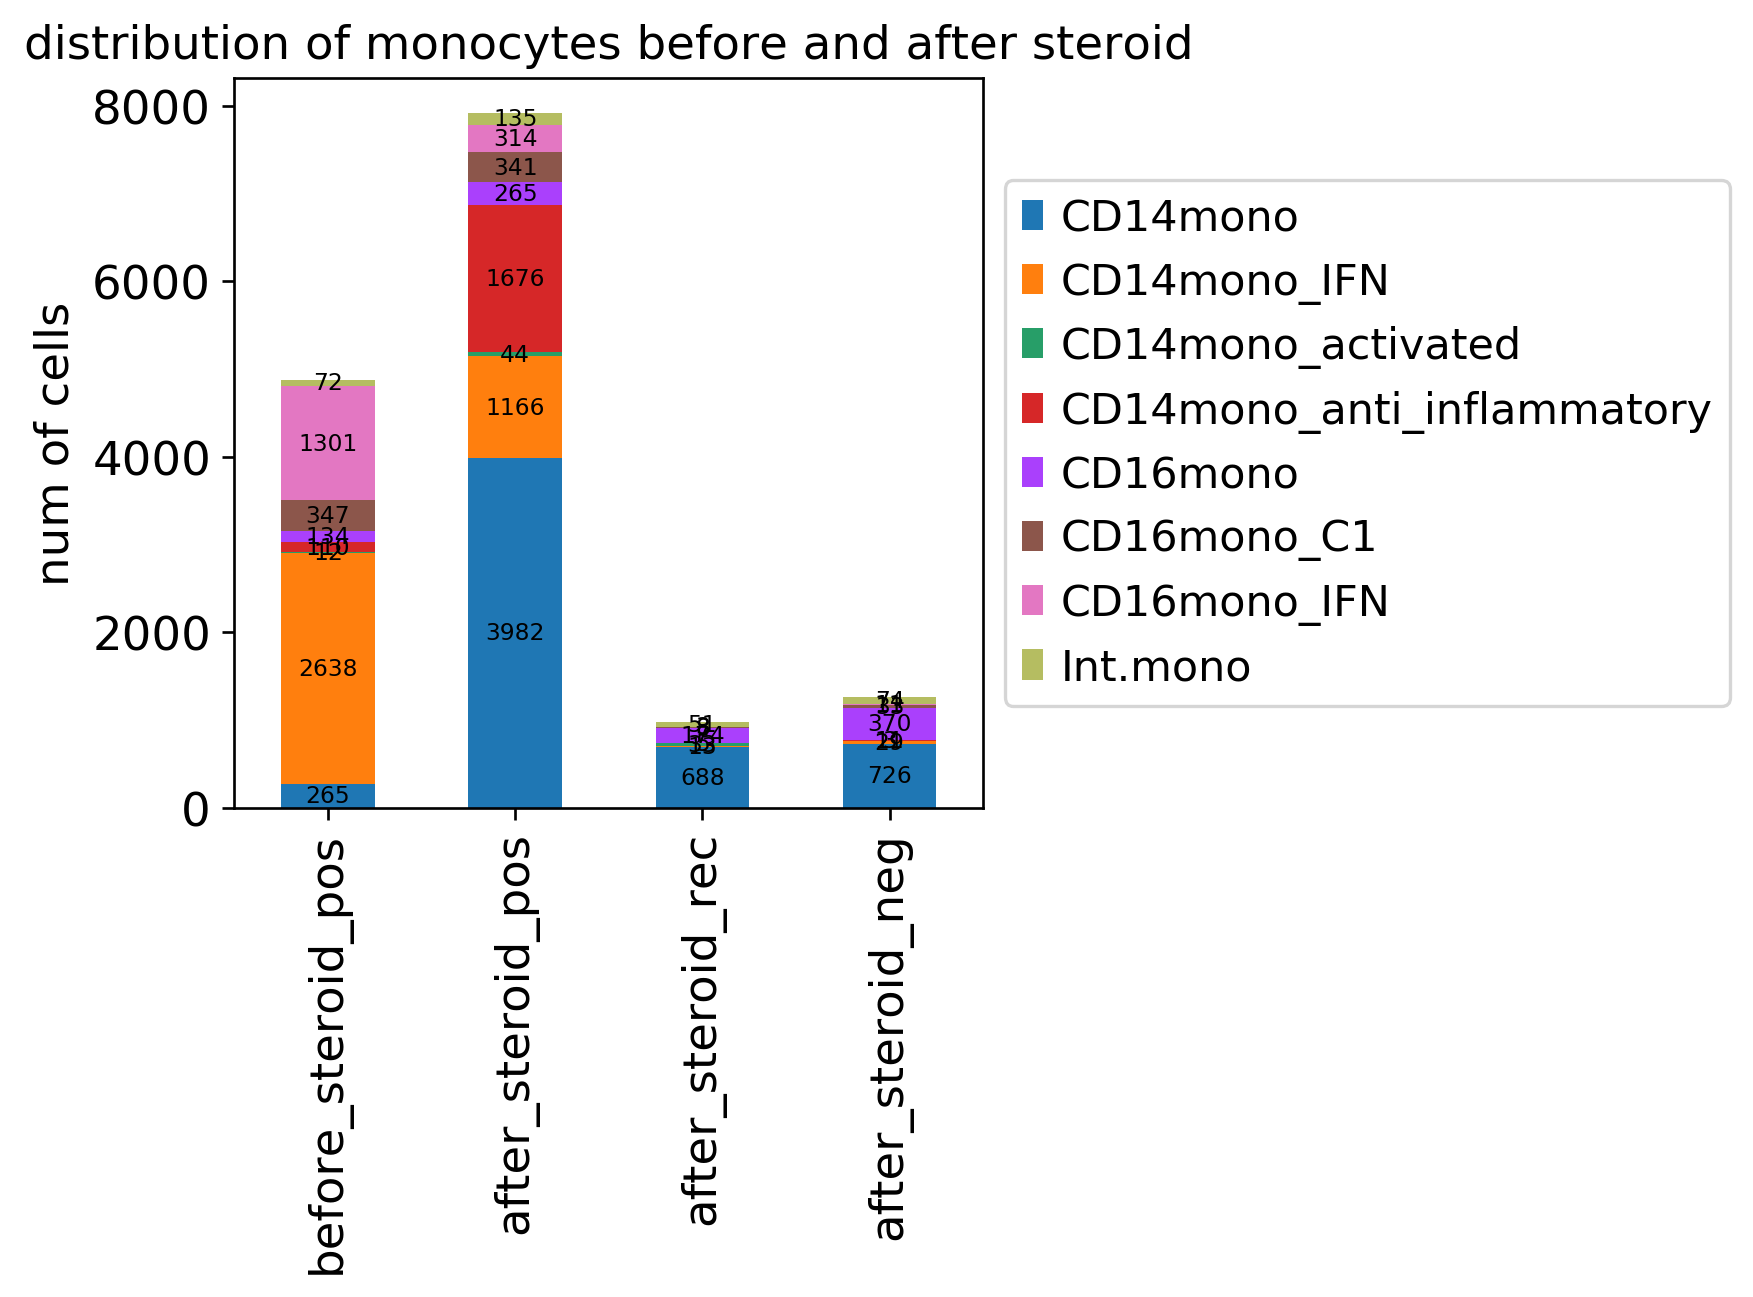

In [46]:
p1=df.plot(x='steroid_timeline', kind='bar', stacked=True,
        title='distribution of monocytes before and after steroid')
p1.set_ylabel('num of cells')
p1.set_xlabel('')

plt.grid(False)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
for p in p1.patches:
        width, height = p.get_width(), p.get_height()
        x, y = p.get_xy() 
        p1.text(x+width/2, 
            y+height/2, 
            '{:.0f}'.format(height), 
            horizontalalignment='center', 
            verticalalignment='center',rotation=0,size=7) 

In [47]:
cols = list(df.columns)
cols = cols[:-1]
df[cols] = df[cols].div(df[cols].sum(axis=1), axis=0).multiply(100)

In [48]:
steroid.obs['steroid_timeline'].value_counts()

after_steroid_pos     7923
before_steroid_pos    4879
after_steroid_neg     1257
after_steroid_rec      975
Name: steroid_timeline, dtype: int64

Text(2.8, 101, '1257')

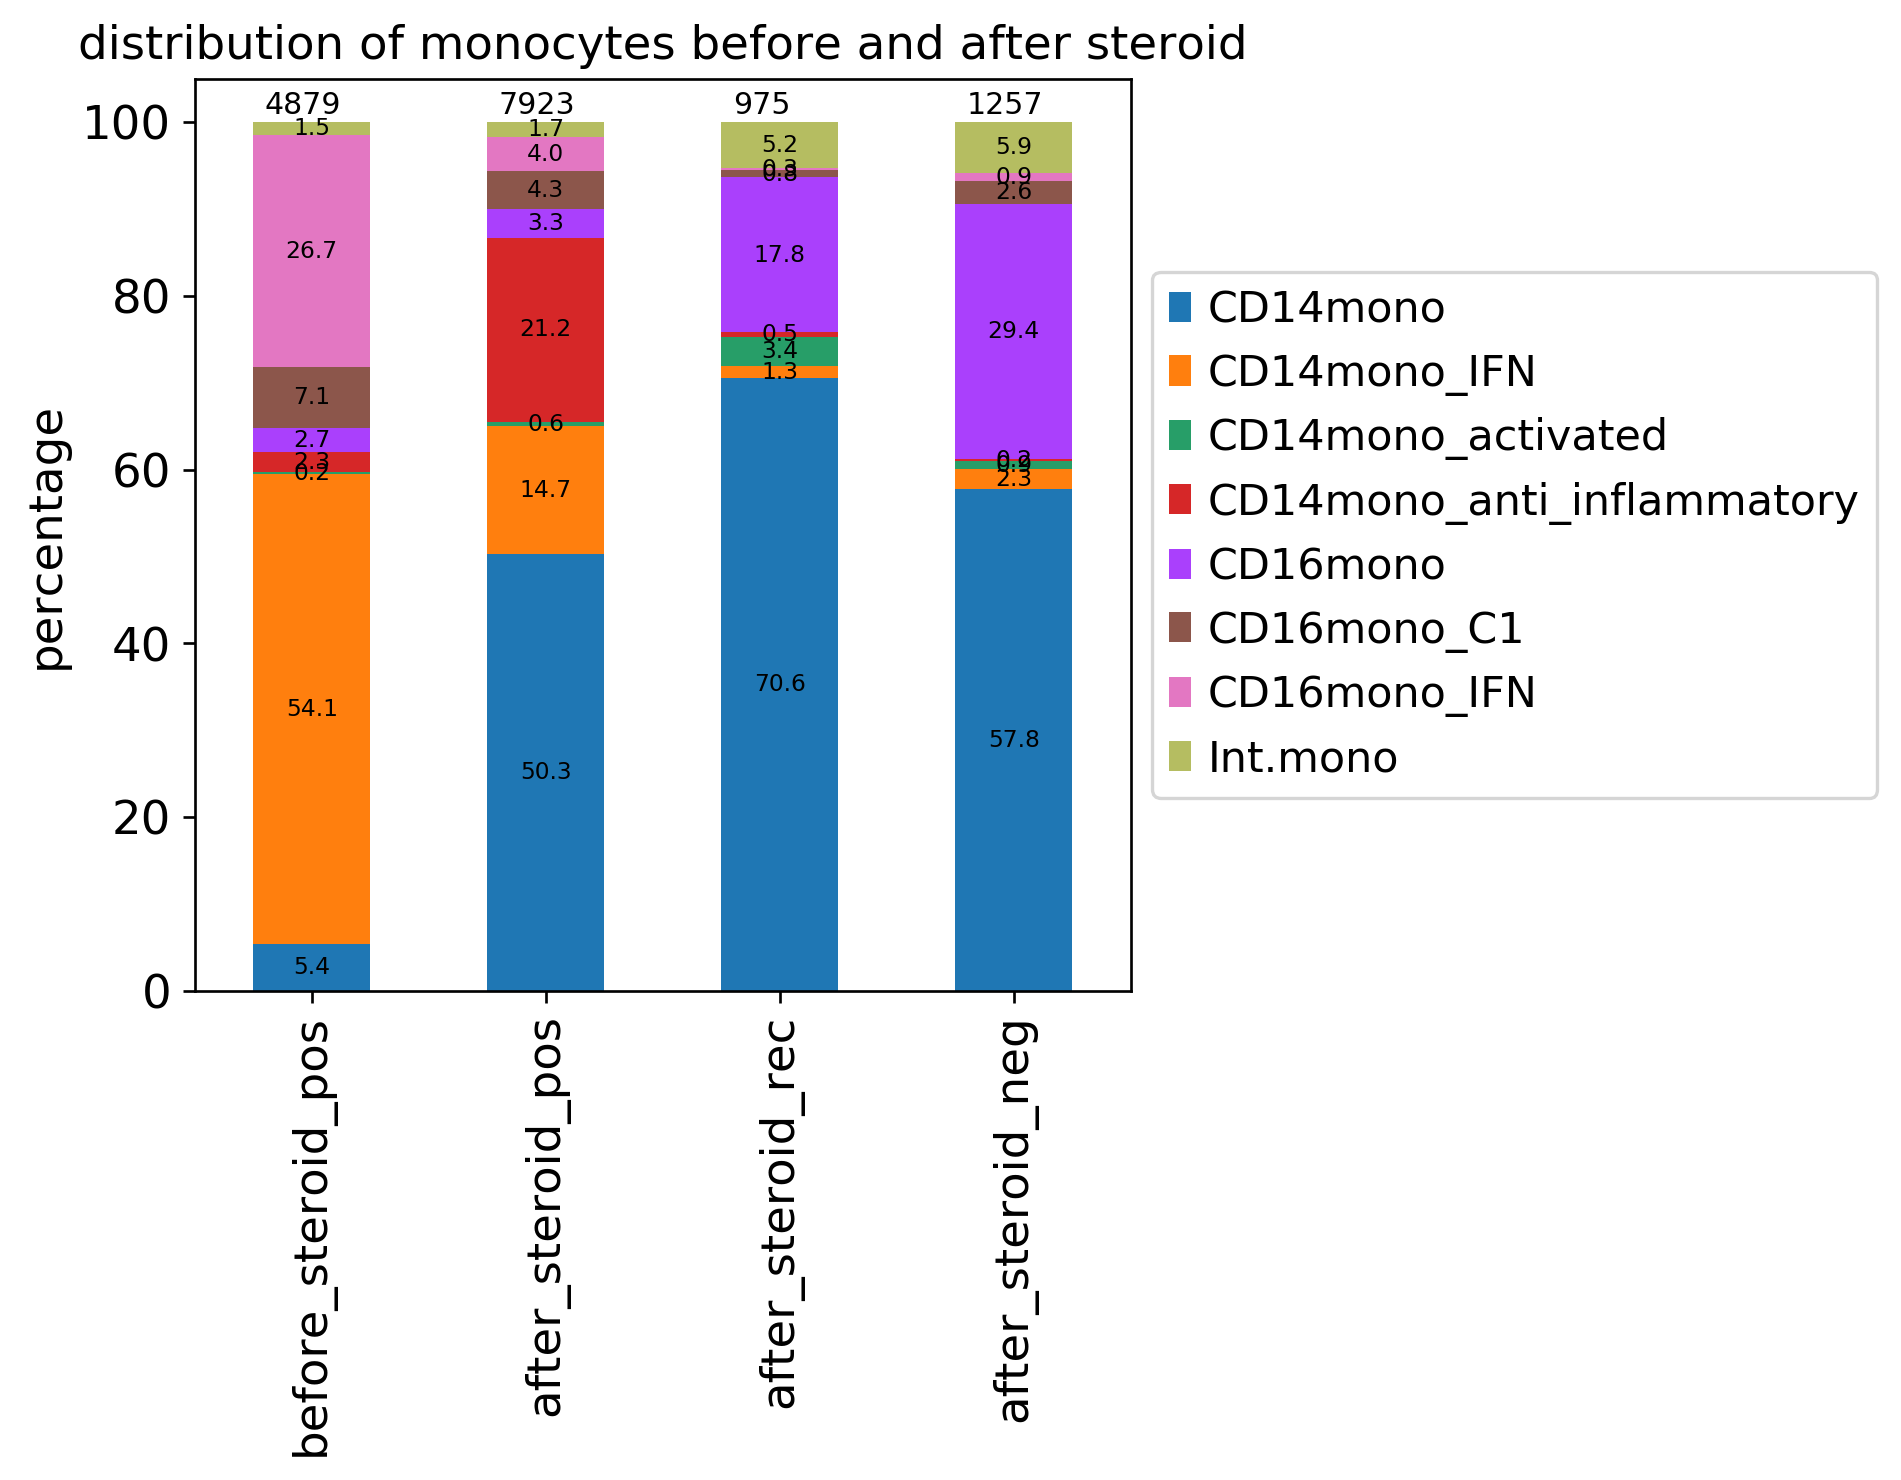

In [49]:
p2 = df.plot(x='steroid_timeline', kind='bar', stacked=True,
        title='distribution of monocytes before and after steroid',figsize=(5,5))
p2.set_xlabel('')
p2.set_ylabel('percentage')
plt.grid(False)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
for p in p2.patches:
        width, height = p.get_width(), p.get_height()
        x, y = p.get_xy() 
        p2.text(x+width/2, 
            y+height/2, 
            '{:.1f}'.format(height), 
            horizontalalignment='center', 
            verticalalignment='center',rotation=0,size=7) 



p2.text(-0.2,101,'4879',fontsize=9)
p2.text(0.8,101,'7923',fontsize=9)
p2.text(1.8,101,'975',fontsize=9)
p2.text(2.8,101,'1257',fontsize=9)

# adding metadata

In [50]:
meta_obs=pd.read_csv('/home/jovyan/data/covid_19_renal/obs_myeloid.csv')

/tmp/ipykernel_180/4236884049.py:1: DtypeWarning: Columns (54,58,62,74,78,82,86,144,145,146,147,149,150,151,161) have mixed types. Specify dtype option on import or set low_memory=False.
  meta_obs=pd.read_csv('/home/jovyan/data/covid_19_renal/obs_myeloid.csv')


In [51]:
mdata = sc.read('/home/jovyan/data/covid_19_renal/renal_covid_19_gex_myeloid_soupX_QC.h5ad',cache=True)

In [52]:
mdata.obs['WHO_temp_severity'] = meta_obs['WHO_temp_severity'].values.astype("str") 
mdata.obs['WHO_temp_severity'] = mdata.obs['WHO_temp_severity'].astype('category')

In [53]:
steroid.obs['WHO_temp_severity'] = steroid.obs['sex'].astype('object')

In [54]:
steroid.obs['WHO_temp_severity'].update(pd.Series(mdata.obs['WHO_temp_severity'].astype('object')))

In [55]:
steroid.obs['WHO_temp_severity'] = steroid.obs['WHO_temp_severity'].astype('category')

In [56]:
steroid.obs['WHO_temp_severity'].unique()

['mild', 'severe', 'moderate', 'nan', 'critical']
Categories (5, object): ['critical', 'mild', 'moderate', 'nan', 'severe']

#  steroid with positive case only -divided into 4 severity 

In [57]:
steroid.obs['steroid_timeline'].unique()

array(['after_steroid_pos', 'before_steroid_pos', 'after_steroid_rec',
       'after_steroid_neg'], dtype=object)

In [58]:
steroid_pos_only = steroid[steroid.obs['steroid_timeline'].isin(['before_steroid_pos','after_steroid_pos'])]

In [59]:
steroid_pos_only.obs['WHO_temp_severity'].unique()

['mild', 'severe', 'moderate', 'critical']
Categories (4, object): ['critical', 'mild', 'moderate', 'severe']

In [60]:
# adding severity and steroid meta
steroid_pos_only.obs['steroid_severity']='nan'

steroid_pos_only.obs.loc[(steroid_pos_only.obs["steroid_timeline"]=='before_steroid_pos')&(steroid_pos_only.obs['WHO_temp_severity']=='mild'), "steroid_severity"] = 'before_steroid_pos_mild'
steroid_pos_only.obs.loc[(steroid_pos_only.obs["steroid_timeline"]=='before_steroid_pos')&(steroid_pos_only.obs['WHO_temp_severity']=='moderate'), "steroid_severity"] = 'before_steroid_pos_moderate'
steroid_pos_only.obs.loc[(steroid_pos_only.obs["steroid_timeline"]=='before_steroid_pos')&(steroid_pos_only.obs['WHO_temp_severity']=='severe'), "steroid_severity"] = 'before_steroid_pos_severe'
steroid_pos_only.obs.loc[(steroid_pos_only.obs["steroid_timeline"]=='before_steroid_pos')&(steroid_pos_only.obs['WHO_temp_severity']=='critical'), "steroid_severity"] = 'before_steroid_pos_critical'

steroid_pos_only.obs.loc[(steroid_pos_only.obs["steroid_timeline"]=='after_steroid_pos')&(steroid_pos_only.obs['WHO_temp_severity']=='mild'), "steroid_severity"] = 'after_steroid_pos_mild'
steroid_pos_only.obs.loc[(steroid_pos_only.obs["steroid_timeline"]=='after_steroid_pos')&(steroid_pos_only.obs['WHO_temp_severity']=='moderate'), "steroid_severity"] = 'after_steroid_pos_moderate'
steroid_pos_only.obs.loc[(steroid_pos_only.obs["steroid_timeline"]=='after_steroid_pos')&(steroid_pos_only.obs['WHO_temp_severity']=='severe'), "steroid_severity"] = 'after_steroid_pos_severe'
steroid_pos_only.obs.loc[(steroid_pos_only.obs["steroid_timeline"]=='after_steroid_pos')&(steroid_pos_only.obs['WHO_temp_severity']=='critical'), "steroid_severity"] = 'after_steroid_pos_critical'


/tmp/ipykernel_180/1759539440.py:2: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  steroid_pos_only.obs['steroid_severity']='nan'


In [61]:
steroid_pos_only.obs['steroid_severity'].unique()

array(['after_steroid_pos_mild', 'before_steroid_pos_severe',
       'after_steroid_pos_moderate', 'before_steroid_pos_moderate',
       'after_steroid_pos_critical', 'before_steroid_pos_mild',
       'after_steroid_pos_severe'], dtype=object)

In [62]:
#test = steroid_pos_only[steroid_pos_only.obs['steroid_severity']=='after_steroid_pos_severe']
#print(test.obs['case_control'].unique())
#print(test.obs['WHO_temp_severity'].unique())

In [63]:
df = pd.crosstab(steroid_pos_only.obs['steroid_severity'],steroid_pos_only.obs['annot4'])
df

annot4,CD14mono,CD14mono_IFN,CD14mono_activated,CD14mono_anti_inflammatory,CD16mono,CD16mono_C1,CD16mono_IFN,Int.mono
steroid_severity,,,,,,,,
after_steroid_pos_critical,1215,264,14,840,102,179,79,47
after_steroid_pos_mild,1070,153,10,362,32,70,92,22
after_steroid_pos_moderate,1292,386,13,270,48,51,41,45
after_steroid_pos_severe,405,363,7,204,83,41,102,21
before_steroid_pos_mild,88,1289,10,19,95,154,985,38
before_steroid_pos_moderate,151,1164,2,29,39,189,303,34
before_steroid_pos_severe,26,185,0,62,0,4,13,0


In [64]:
df.columns = df.columns.add_categories(['steroid_severity'])
df['steroid_severity'] = df.index 
df

annot4,CD14mono,CD14mono_IFN,CD14mono_activated,CD14mono_anti_inflammatory,CD16mono,CD16mono_C1,CD16mono_IFN,Int.mono,steroid_severity
steroid_severity,,,,,,,,,
after_steroid_pos_critical,1215,264,14,840,102,179,79,47,after_steroid_pos_critical
after_steroid_pos_mild,1070,153,10,362,32,70,92,22,after_steroid_pos_mild
after_steroid_pos_moderate,1292,386,13,270,48,51,41,45,after_steroid_pos_moderate
after_steroid_pos_severe,405,363,7,204,83,41,102,21,after_steroid_pos_severe
before_steroid_pos_mild,88,1289,10,19,95,154,985,38,before_steroid_pos_mild
before_steroid_pos_moderate,151,1164,2,29,39,189,303,34,before_steroid_pos_moderate
before_steroid_pos_severe,26,185,0,62,0,4,13,0,before_steroid_pos_severe


In [65]:
df=df.reindex(["before_steroid_pos_mild", "after_steroid_pos_mild", "before_steroid_pos_moderate",'after_steroid_pos_moderate','before_steroid_pos_severe','after_steroid_pos_severe',
              'after_steroid_pos_critical'])
df

annot4,CD14mono,CD14mono_IFN,CD14mono_activated,CD14mono_anti_inflammatory,CD16mono,CD16mono_C1,CD16mono_IFN,Int.mono,steroid_severity
steroid_severity,,,,,,,,,
before_steroid_pos_mild,88,1289,10,19,95,154,985,38,before_steroid_pos_mild
after_steroid_pos_mild,1070,153,10,362,32,70,92,22,after_steroid_pos_mild
before_steroid_pos_moderate,151,1164,2,29,39,189,303,34,before_steroid_pos_moderate
after_steroid_pos_moderate,1292,386,13,270,48,51,41,45,after_steroid_pos_moderate
before_steroid_pos_severe,26,185,0,62,0,4,13,0,before_steroid_pos_severe
after_steroid_pos_severe,405,363,7,204,83,41,102,21,after_steroid_pos_severe
after_steroid_pos_critical,1215,264,14,840,102,179,79,47,after_steroid_pos_critical


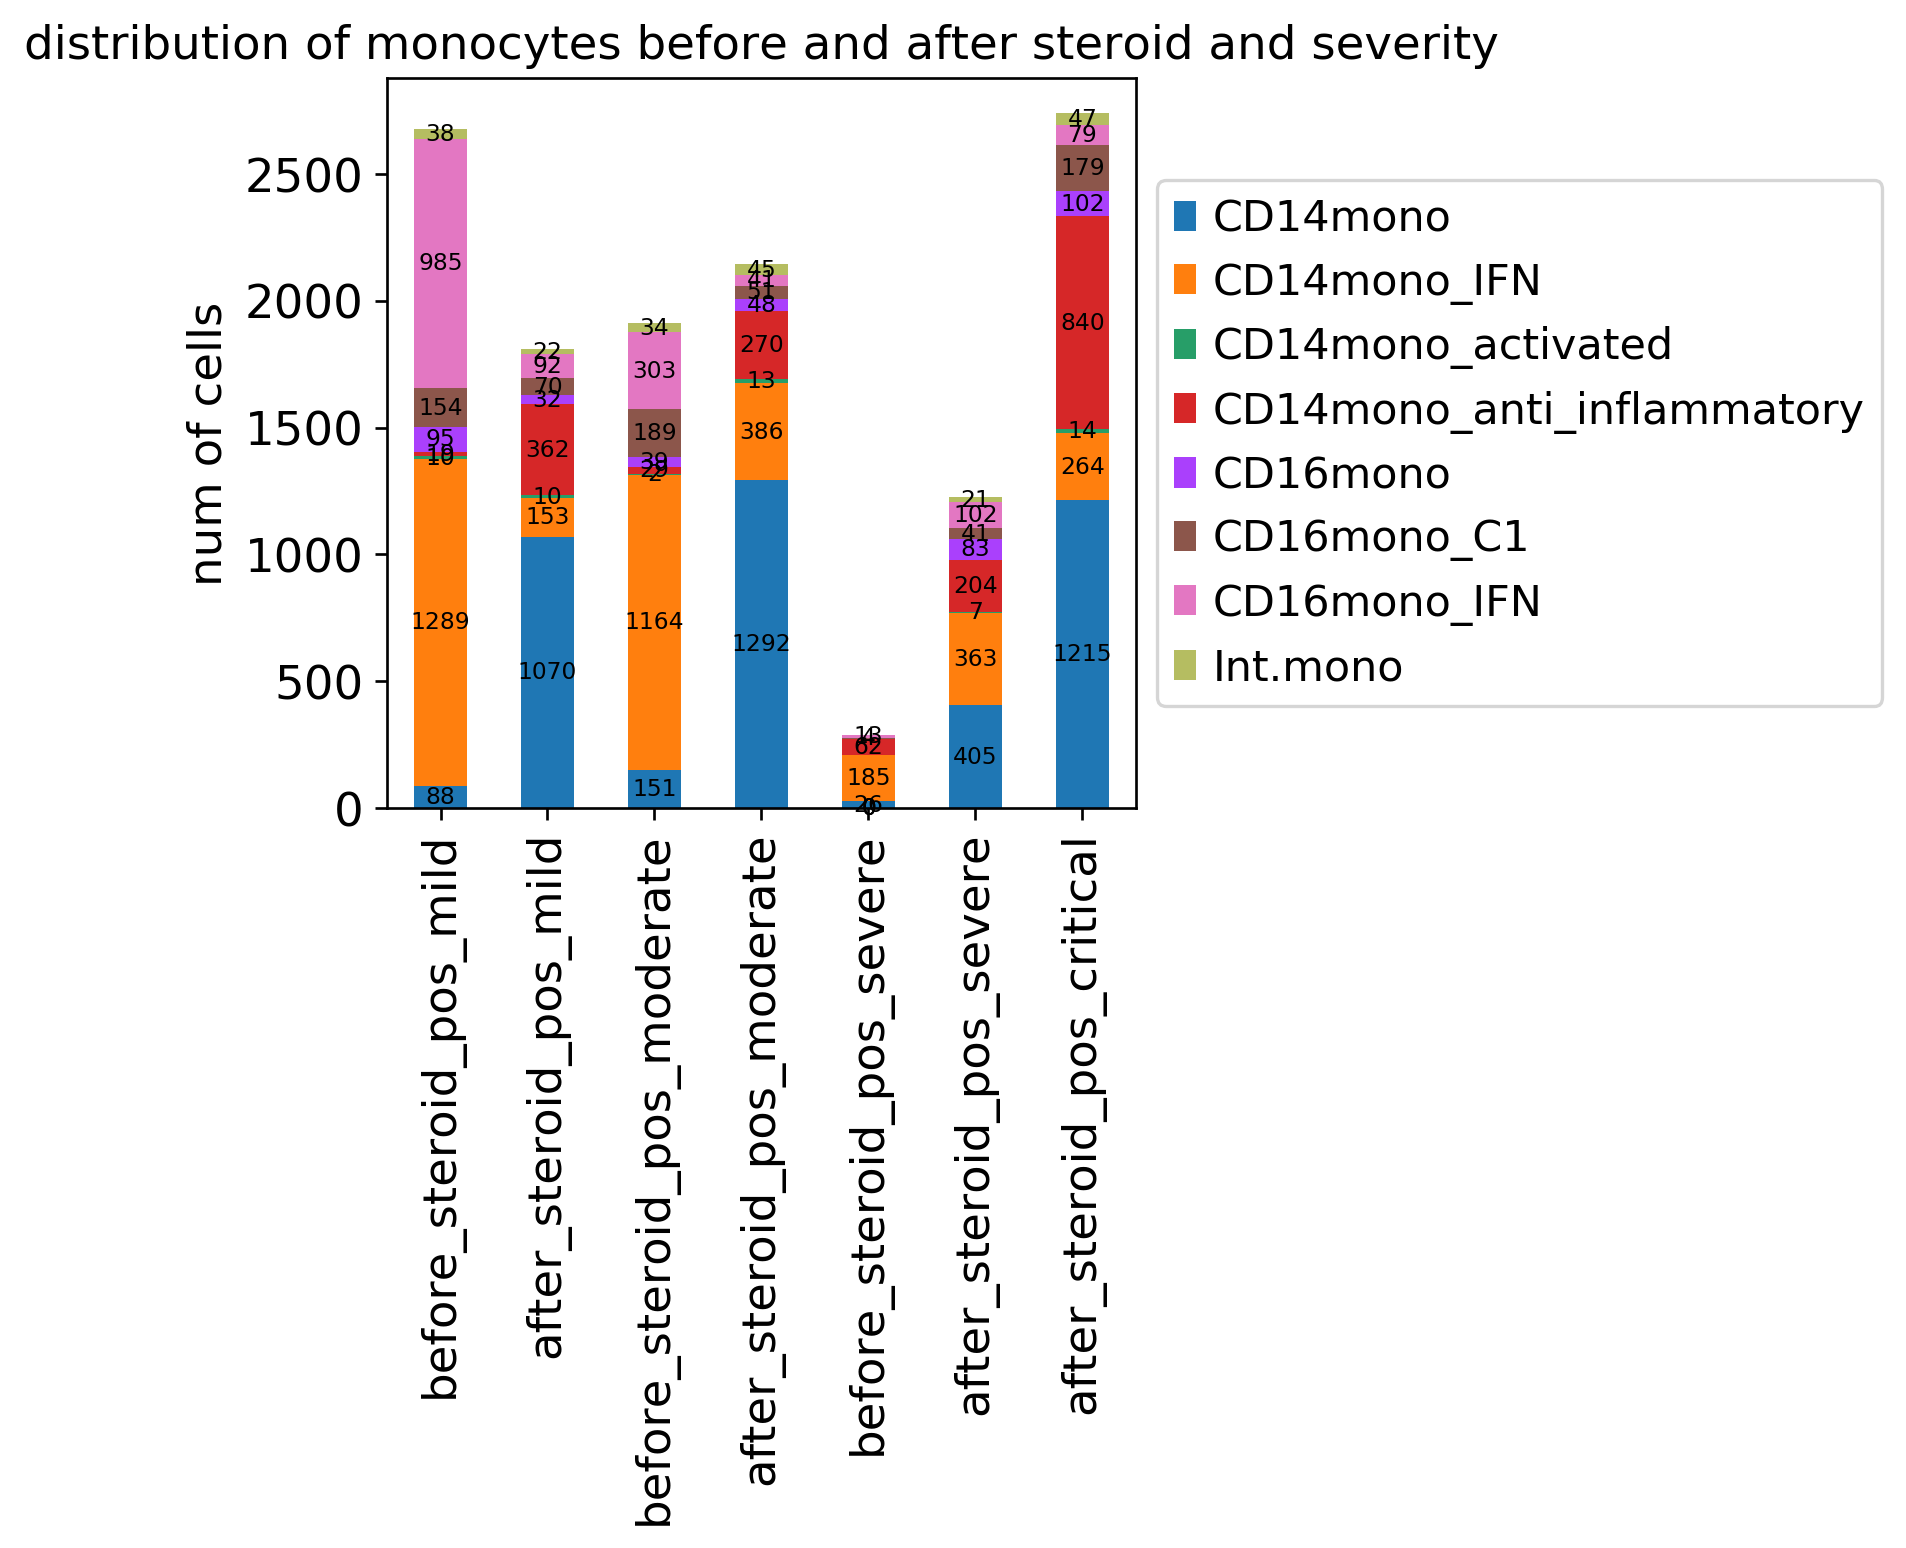

In [66]:
p1=df.plot(x='steroid_severity', kind='bar', stacked=True,
        title='distribution of monocytes before and after steroid and severity')
p1.set_ylabel('num of cells')
p1.set_xlabel('')

plt.grid(False)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
for p in p1.patches:
        width, height = p.get_width(), p.get_height()
        x, y = p.get_xy() 
        p1.text(x+width/2, 
            y+height/2, 
            '{:.0f}'.format(height), 
            horizontalalignment='center', 
            verticalalignment='center',rotation=0,size=7) 

In [67]:
cols = list(df.columns)
cols = cols[:-1]
df[cols] = df[cols].div(df[cols].sum(axis=1), axis=0).multiply(100)

In [68]:
df

annot4,CD14mono,CD14mono_IFN,CD14mono_activated,CD14mono_anti_inflammatory,CD16mono,CD16mono_C1,CD16mono_IFN,Int.mono,steroid_severity
steroid_severity,,,,,,,,,
before_steroid_pos_mild,3.286034,48.132935,0.373413,0.709485,3.547423,5.750560,36.781180,1.418969,before_steroid_pos_mild
after_steroid_pos_mild,59.083379,8.448371,0.552181,19.988956,1.766980,3.865268,5.080066,1.214798,after_steroid_pos_mild
before_steroid_pos_moderate,7.901622,60.910518,0.104657,1.517530,2.040816,9.890110,15.855573,1.779173,before_steroid_pos_moderate
after_steroid_pos_moderate,60.205033,17.986952,0.605778,12.581547,2.236719,2.376514,1.910531,2.096925,after_steroid_pos_moderate
before_steroid_pos_severe,8.965517,63.793103,0.000000,21.379310,0.000000,1.379310,4.482759,0.000000,before_steroid_pos_severe
after_steroid_pos_severe,33.034258,29.608483,0.570962,16.639478,6.769984,3.344209,8.319739,1.712887,after_steroid_pos_severe
after_steroid_pos_critical,44.343066,9.635036,0.510949,30.656934,3.722628,6.532847,2.883212,1.715328,after_steroid_pos_critical


In [69]:
steroid_pos_only.obs['steroid_severity'].value_counts()

after_steroid_pos_critical     2740
before_steroid_pos_mild        2678
after_steroid_pos_moderate     2146
before_steroid_pos_moderate    1911
after_steroid_pos_mild         1811
after_steroid_pos_severe       1226
before_steroid_pos_severe       290
Name: steroid_severity, dtype: int64

Text(5.8, 101, '2740')

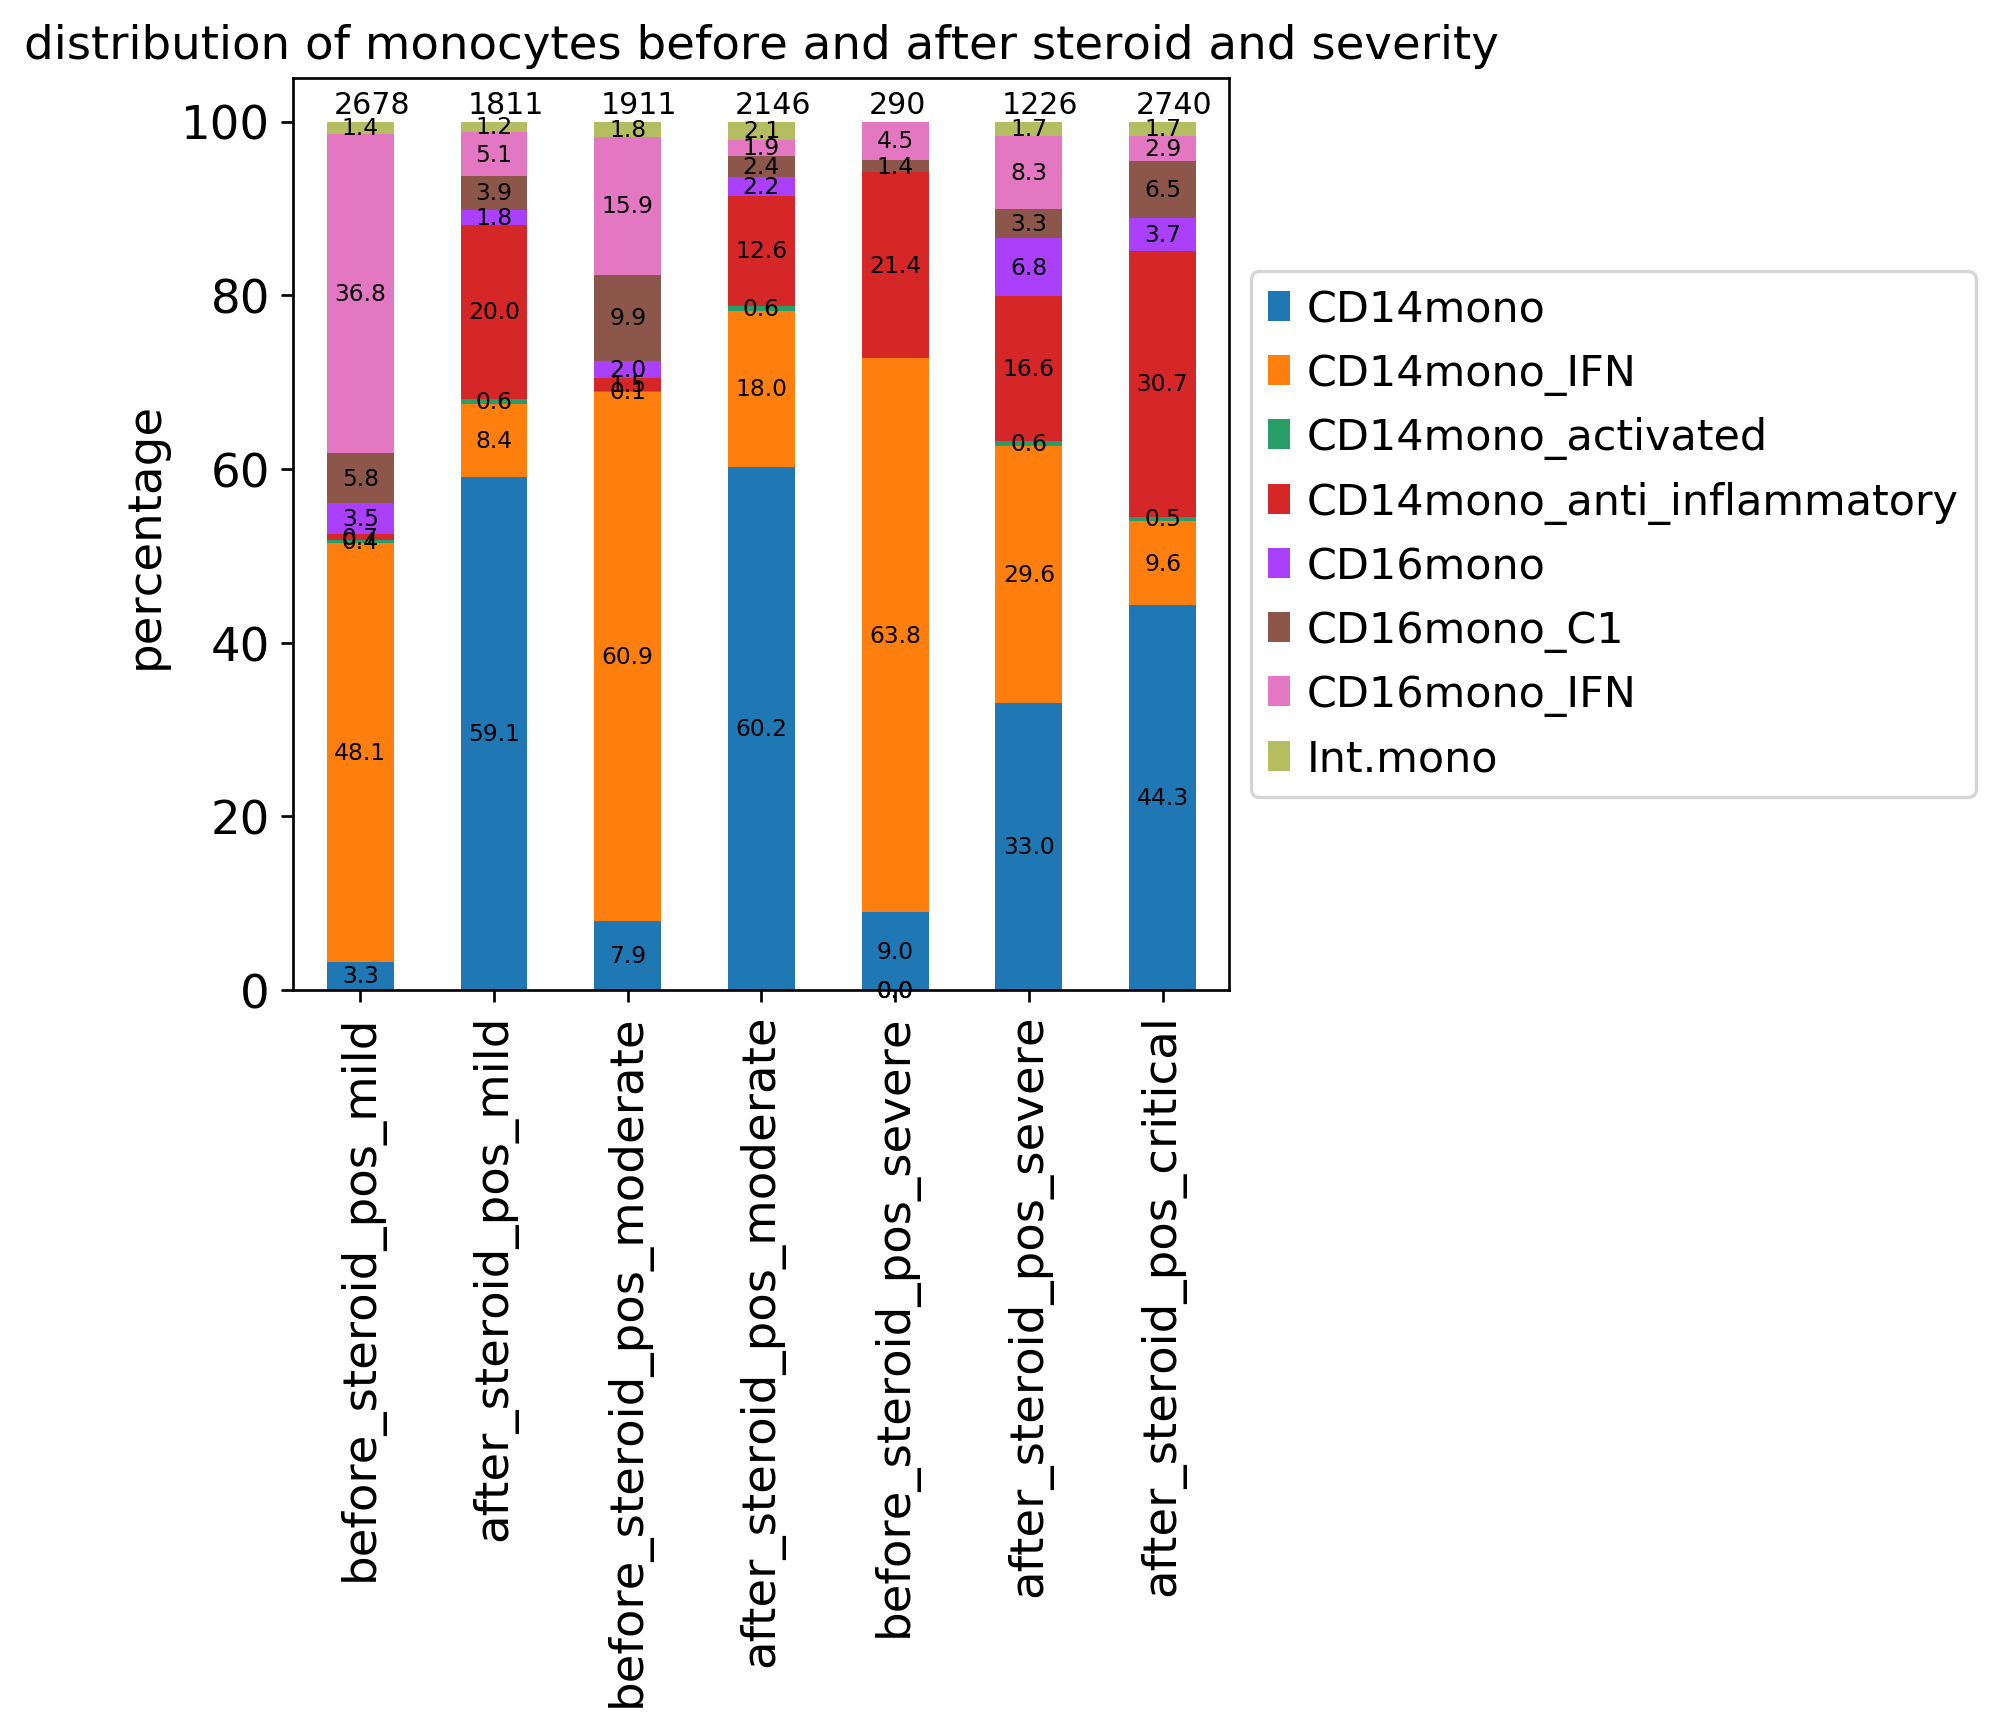

In [70]:
p2 = df.plot(x='steroid_severity', kind='bar', stacked=True,
        title='distribution of monocytes before and after steroid and severity',figsize=(5,5))
p2.set_xlabel('')
p2.set_ylabel('percentage')
plt.grid(False)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
for p in p2.patches:
        width, height = p.get_width(), p.get_height()
        x, y = p.get_xy() 
        p2.text(x+width/2, 
            y+height/2, 
            '{:.1f}'.format(height), 
            horizontalalignment='center', 
            verticalalignment='center',rotation=0,size=7) 



p2.text(-0.2,101,'2678',fontsize=9)
p2.text(0.8,101,'1811',fontsize=9)
p2.text(1.8,101,'1911',fontsize=9)
p2.text(2.8,101,'2146',fontsize=9)
p2.text(3.8,101,'290',fontsize=9)
p2.text(4.8,101,'1226',fontsize=9)
p2.text(5.8,101,'2740',fontsize=9)

In [71]:
save_file = '/home/jovyan/scripts/renal_covid_19/steroid_pipeline/steroid_pos_only.h5ad'
steroid_pos_only.write_h5ad(save_file)